In [90]:
import os
import zipfile
# import random
# import shutil
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from shutil import copyfile
# import matplotlib.pyplot as plt
# import psutil
# import time

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [91]:
train_data_path = "train"
validation_data_path = "valid"
test_data_path = "test"

In [92]:
img_width, img_height = 150, 150
# channel = (3, )
input_shape = (img_width, img_height)
# input_shape = tf.expand_dims(input_shape , -1)
batch_size = 64

In [93]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'

)

test_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  fill_mode='nearest'

                                  )

In [94]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode="categorical",
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=input_shape,
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_data_path,
                                                  target_size=input_shape,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 260915 images belonging to 14 classes.
Found 47531 images belonging to 14 classes.
Found 137375 images belonging to 14 classes.


In [95]:
def tf_data_generator(generator, input_shape):
  num_class = generator.num_classes
  print(num_class)

  # Define a separate function for generating data
  def _generator():
    for images, labels in generator:
      yield images, labels

  # Create the tf.data.Dataset from the non-decorated function
  tf_generator = tf.data.Dataset.from_generator(
      _generator,
      output_types=(tf.float32, tf.float32),
      output_shapes=([None, input_shape[0], input_shape[1], None],
                     [None, num_class])
  )

  return tf_generator


train_data_generator = tf_data_generator(train_generator, input_shape)
test_data_generator = tf_data_generator(test_generator, input_shape)
val_data_generator = tf_data_generator(validation_generator, input_shape)

14
14
14


In [96]:
from tensorflow.keras.applications import MobileNetV2

In [97]:
def create_model(img_width, img_height, num_classes):

    # model = Sequential([
        # tf.keras.layers.Conv2D(
        #     32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3), kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        
        # Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.25),
        
        # Conv2D(64, kernel_size=(3, 3), activation='relu',
        #        kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        # Dropout(0.25),
        
        # Conv2D(128, kernel_size=(3, 3), activation='relu',
        #        kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.25),
        
        # Flatten(),
        
        # Dense(512, activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        # Dropout(0.5),
        
        # Dense(128, activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.BatchNormalization(),
        # Dropout(0.5),
        
        # Dense(14, activation='softmax'),
        
        
        
        
        

        # tf.keras.layers.Conv2D(
        #     8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3), kernel_initializer='he_uniform'),
        # tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
        # tf.keras.layers.MaxPooling2D(2, 2),

        # tf.keras.layers.Flatten(),
        # tf.keras.layers.Dense(512, activation='relu'),
        # tf.keras.layers.Dropout(0.3),
        # tf.keras.layers.Dense(14, activation='softmax'),
    # ])
    
    base_model = MobileNetV2(
    input_shape=input_shape + (3,),
    include_top=False,
    weights='imagenet',
    classes=num_classes,
    )
        
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    
    # x = layers.Conv2D(8, (3, 3), activation='relu', input_shape=(img_width, img_height, 3), kernel_initializer='he_uniform')(x)
    # x = layers.Conv2D(8, (3, 3), activation='relu')(x)
    # x = layers.MaxPooling2D(2, 2)(x)
    
    # x = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.MaxPooling2D(2, 2)(x)
    
    # x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.MaxPooling2D(2, 2)(x)
    
    # x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x)
    # x = layers.MaxPooling2D(2, 2)(x)
    
    # x = layers.Flatten()(x)
    # x = layers.Dense(512, activation="relu")(x)
    # x = layers.Dropout(0.3)(x)
    x = layers.Dense(1024, activation="relu")(x)
    
    
    predictions = layers.Dense(num_classes, activation="softmax")(x)
    model = Model(inputs=base_model.input, outputs=predictions)

    return model


model = create_model(img_width, img_height, 14)

In [98]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(
    loss="categorical_crossentropy",
    # optimizer="adam",
    optimizer=opt,
    metrics=["accuracy", "categorical_crossentropy"],
)

In [99]:
model_viz = tf.keras.utils.plot_model(model,
                                      to_file='model.png',
                                      show_shapes=True,
                                      show_layer_names=True,
                                      rankdir='TB',
                                      expand_nested=True,
                                      dpi=55)
model_viz

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [100]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor="val_loss", patience=10)

history1 = model.fit(
    train_data_generator,
    steps_per_epoch=len(train_generator) // train_generator.batch_size,
    epochs=30,
    validation_data=val_data_generator,
    validation_steps=len(
        validation_generator) // validation_generator.batch_size,
    callbacks=[early_stopping],
)

Epoch 1/30


63/63 [==============================] - 158s 2s/step - loss: 2.4881 - accuracy: 0.1902 - categorical_crossentropy: 2.4881 - val_loss: 4.3897 - val_accuracy: 0.1207 - val_categorical_crossentropy: 4.3897
Epoch 2/30
63/63 [==============================] - 182s 3s/step - loss: 2.2961 - accuracy: 0.2413 - categorical_crossentropy: 2.2961 - val_loss: 5.8255 - val_accuracy: 0.1136 - val_categorical_crossentropy: 5.8255
Epoch 3/30
63/63 [==============================] - 236s 4s/step - loss: 2.2732 - accuracy: 0.2470 - categorical_crossentropy: 2.2732 - val_loss: 4.9295 - val_accuracy: 0.1264 - val_categorical_crossentropy: 4.9295
Epoch 4/30
63/63 [==============================] - 315s 5s/step - loss: 2.1955 - accuracy: 0.2842 - categorical_crossentropy: 2.1955 - val_loss: 5.8206 - val_accuracy: 0.1108 - val_categorical_crossentropy: 5.8206
Epoch 5/30
63/63 [==============================] - 367s 6s/step - loss: 2.1964 - accuracy: 0.2924 - categorical_crossentropy: 2.1964 - val_loss: 3.678

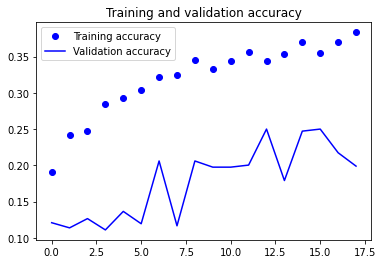

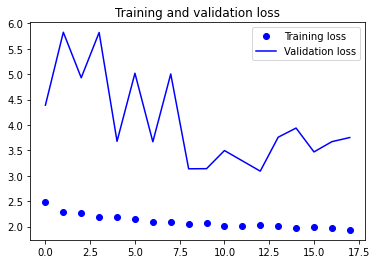

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()